In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r'C:\Users\FCT\Desktop\Student Grade Prediction\student.csv')
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,yes,3,2,3,10,7,8,10


In [5]:
print('Total number of students: ',len(df))

Total number of students:  395


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'failures',
       'Ssupport', 'Gsupport', 'feespaid', 'ecactivities', 'internet',
       'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          393 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


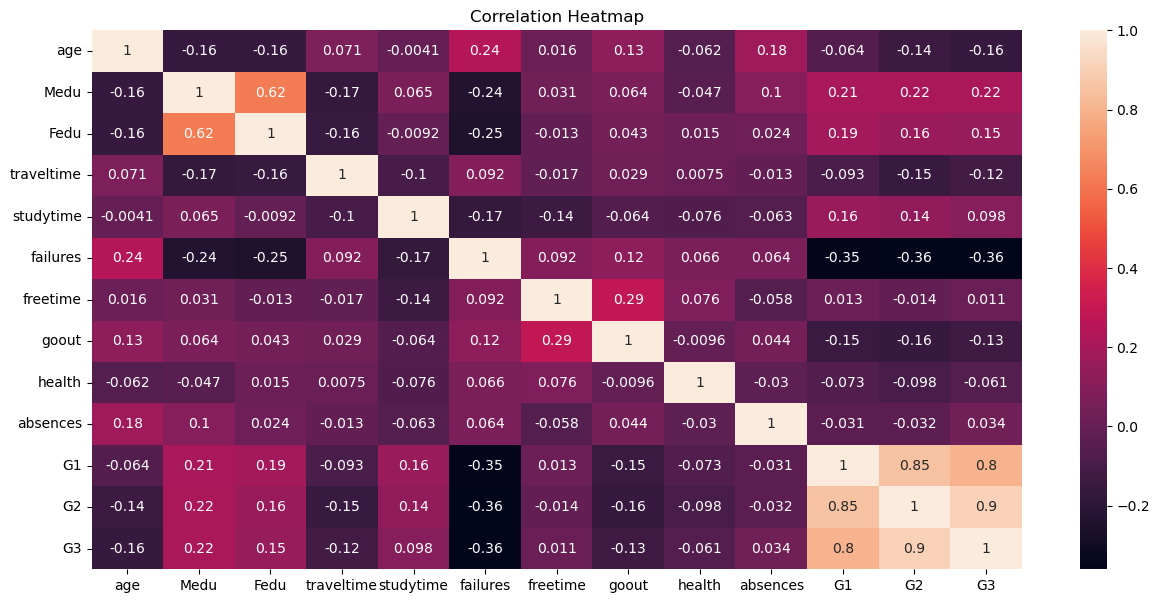

In [11]:
plt.figure(figsize=(15,7))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

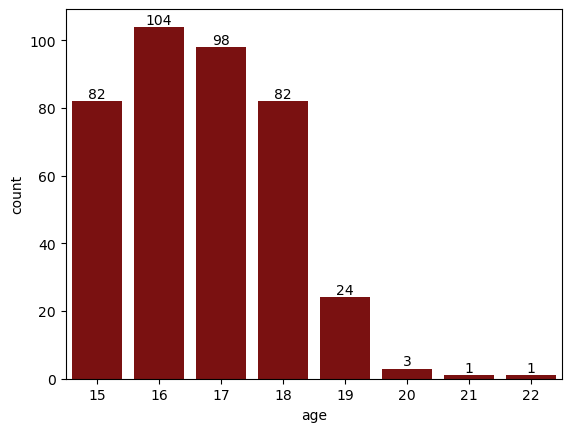

In [13]:
x=sns.countplot(x="age",data=df, color='darkred')
for count in x.containers:
    x.bar_label(count)

In [15]:
df=df.dropna()
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
guardian        0
traveltime      0
studytime       0
failures        0
Ssupport        0
Gsupport        0
feespaid        0
ecactivities    0
internet        0
freetime        0
goout           0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["internet"]=le.fit_transform(df["internet"])
df["ecactivities"]=le.fit_transform(df["ecactivities"])
df["feespaid"]=le.fit_transform(df["feespaid"])
df["Gsupport"]=le.fit_transform(df["Gsupport"])
df["Ssupport"]=le.fit_transform(df["Ssupport"])
df["guardian"]=le.fit_transform(df["guardian"])
df["Fjob"]=le.fit_transform(df["Fjob"])
df["Mjob"]=le.fit_transform(df["Mjob"])
df["Pstatus"]=le.fit_transform(df["Pstatus"])
df["famsize"]=le.fit_transform(df["famsize"])
df["address"]=le.fit_transform(df["address"])
df["sex"]=le.fit_transform(df["sex"])
df["school"]=le.fit_transform(df["school"])

C:\Users\FCT\AppData\Local\Temp\ipykernel_8196\1020959096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["internet"]=le.fit_transform(df["internet"])
C:\Users\FCT\AppData\Local\Temp\ipykernel_8196\1020959096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ecactivities"]=le.fit_transform(df["ecactivities"])
C:\Users\FCT\AppData\Local\Temp\ipykernel_8196\1020959096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [19]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,0,3,4,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,0,1,3,3,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,1,3,2,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,2,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,3,2,5,4,6,10,10


In [21]:
df.corr()['G3'].sort_values()

failures       -0.361516
age            -0.159038
goout          -0.131003
traveltime     -0.114305
Ssupport       -0.076498
health         -0.068416
Pstatus        -0.066739
guardian       -0.066635
school         -0.045288
Gsupport       -0.038929
freetime        0.006352
ecactivities    0.011717
absences        0.035335
Fjob            0.045867
famsize         0.077170
internet        0.092932
feespaid        0.098037
sex             0.099496
studytime       0.100557
Mjob            0.103961
address         0.106289
Fedu            0.154113
Medu            0.218832
G1              0.800672
G2              0.904715
G3              1.000000
Name: G3, dtype: float64

In [23]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:9]
most_correlated

G3            1.000000
G2            0.904715
G1            0.800672
failures      0.361516
Medu          0.218832
age           0.159038
Fedu          0.154113
goout         0.131003
traveltime    0.114305
Name: G3, dtype: float64

In [27]:
df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,Medu,age,Fedu,goout,traveltime
0,6,6,5,0,4,18,4,4,2
1,6,5,5,0,1,17,1,3,1
2,10,8,7,3,1,15,1,2,1
3,15,14,15,0,4,15,2,2,1
4,10,10,6,0,3,16,3,2,1


In [41]:
df['G3'].unique()

array([ 6, 10, 15, 11, 19,  9, 12, 16, 14,  5,  8, 17, 18, 13, 20,  7,  0,
        4], dtype=int64)

In [29]:
X=df.drop(columns=['G3'], axis=1)
y=df['G3']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [33]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test is the actual target values for X_test
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("F1 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 2.363455317867058
Mean Absolute Error: 1.0918438439773877
F1 Score: 0.8509412128709923


In [37]:

# Define the mapping function for G3 categories
def grade_category(g3_value):
    """
    Maps G3 values to performance categories.
    :param g3_value: float or int, the G3 value (1-7)
    :return: str, the corresponding performance category
    """
    categories = {
        1: "Very Poor",
        2: "Very Poor",
        3: "Very Poor",
        4: "Poor",
        5: "Poor",
        6: "Below Average",
        7: "Below Average",
        8: "Average",
        9: "Average",
        10: "Above Average",
        11: "Above Average",
        12: "Good",
        13: "Good",
        14: "Good",
        15: "Very Good",
        16: "Very Good",
        17: "Excellent",
        18: "Excellent",
        19: "Excellent",
        20: "Outstanding"
    }
    # Convert predicted G3 value to nearest integer and map to a category
    g3_rounded = round(g3_value)
    return categories.get(g3_rounded, "Invalid Grade")

# Predict a single example and map it to a category
example = [[6, 5, 0, 4, 8, 4, 4, 2]]  # Replace with your feature values
predicted_g3 = model.predict(example)[0]
performance_category = grade_category(predicted_g3)

# Display the results
print(f"Predicted G3: {predicted_g3:.2f}")
print(f"Performance Category: {performance_category}")

Predicted G3: 6.05
Performance Category: Good


C:\Users\FCT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
